In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
import pandas as pd
from datetime import datetime

## Easy

In [3]:
df = pd.read_csv("../data/marketing_campaign.csv", sep=';')
df["Age"] = datetime.now().year - df["Year_Birth"]
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,0,0,0,0,0,0,3,11,1,67
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,0,0,0,0,0,0,3,11,0,70
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,0,0,0,0,3,11,0,59
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,0,0,0,0,0,3,11,0,40
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,0,0,0,0,3,11,0,43


Количество жалоб:

In [4]:
df["Complain"].sum() 

21

In [5]:
df[(df["MntFishProducts"] > 0) | (df["MntWines"] > 0) | (df["MntFruits"] > 0) | (df["MntMeatProducts"] > 0) | (df["MntSweetProducts"] > 0) | (df["MntGoldProds"] > 0)]["Age"].mean()

55.19419642857143

In [6]:
df["Age"].mean()

55.19419642857143

Средний возраст одинаковый, т.к. каждый клиент совершил хотя бы одну покупку, значит, выборки совпадают и среднее на них тоже

## Medium

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
df["K&Thome"] = df["Kidhome"] + df["Teenhome"] # add sum of kids and teens

Для начала посчитаем количество людей разных групп, это поможет нам выделить признаки ЦА для hard задачи. Видно, что это люди в браке или с партнёром, имеющие высшее образование и одного ребёка или не имеющие детей вовсе

<Figure size 640x480 with 0 Axes>

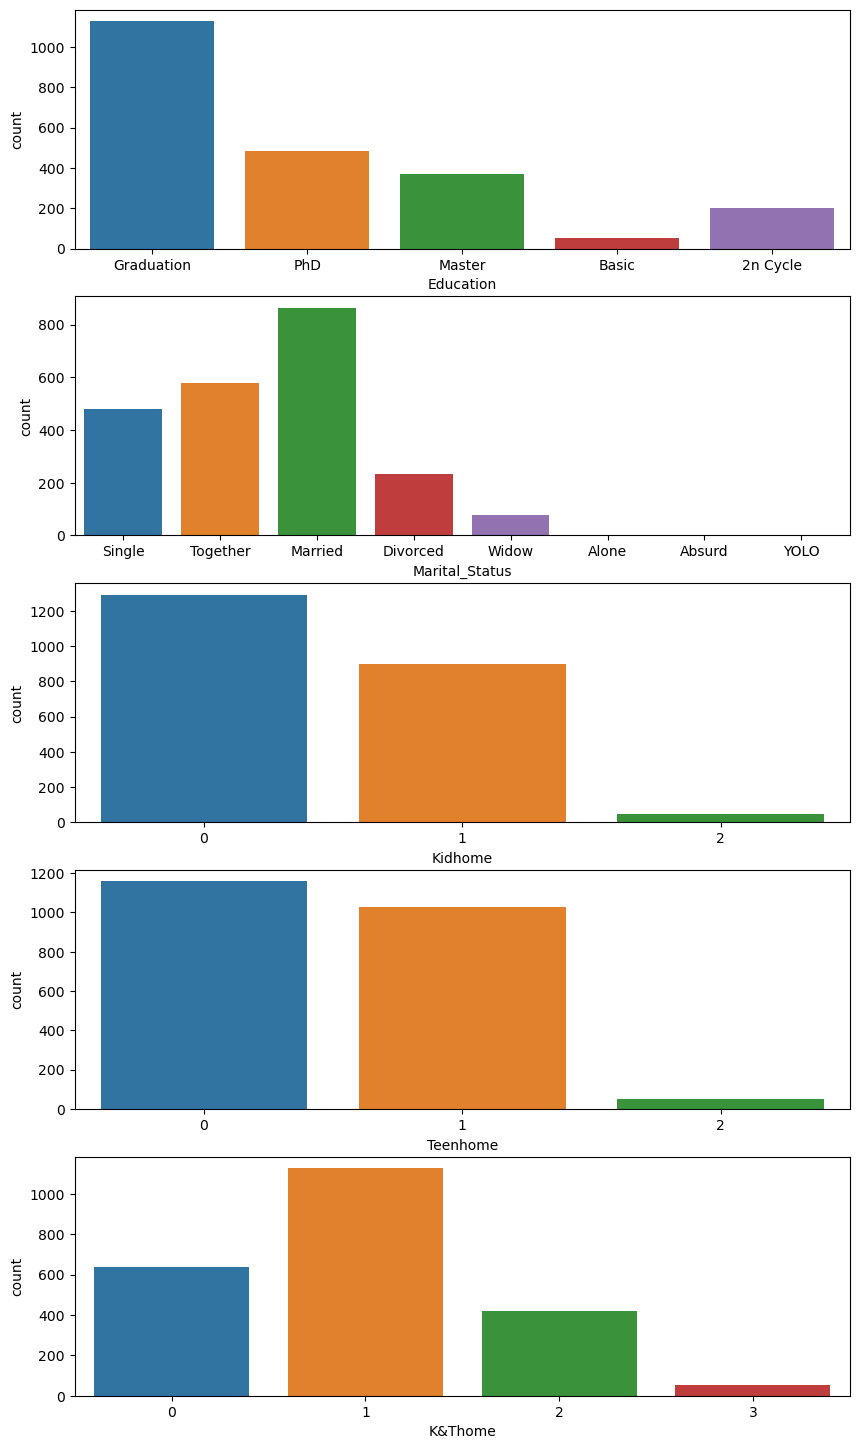

In [9]:
countplot_columns = ["Education", "Marital_Status", "Kidhome", "Teenhome", "K&Thome"]
plt.tight_layout()
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.7)
fig, axs = plt.subplots(len(countplot_columns), 1, figsize=(10, 18))

for i in range(0, len(countplot_columns)):
    plt.subplot(len(countplot_columns), 1, i+1)
    sns.countplot(x=countplot_columns[i], data=df)
    

Посмотрим, как распределение по возрасту, доходу и количеству дней с последней покупки

In [10]:
df_nospaces = df.dropna(how="any")

<Figure size 640x480 with 0 Axes>

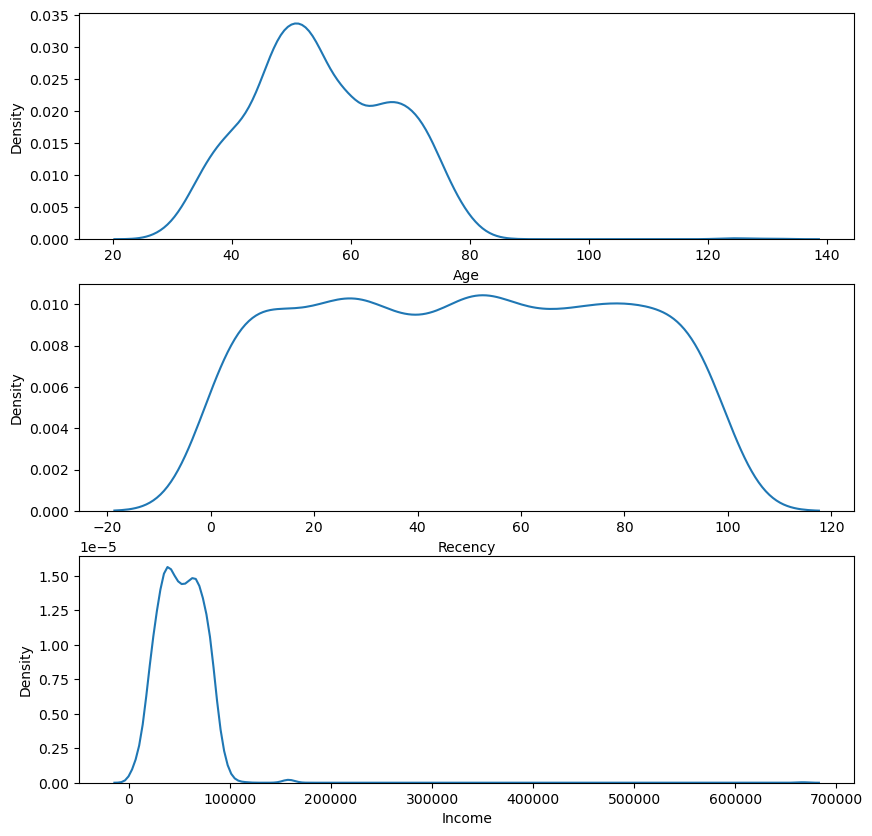

In [11]:
kdeplot_columns = ["Age", "Recency", "Income"]

plt.tight_layout()
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=2.5)
fig, axs = plt.subplots(len(kdeplot_columns), 1, figsize=(10, 10))

for i in range(0, len(kdeplot_columns)):
    plt.subplot(len(kdeplot_columns), 1, i+1)
    sns.kdeplot(data=df_nospaces, x=kdeplot_columns[i])

Можно заметить, что люди без высшего образования очень покупают товары через онлайн магазин реже, чем остальные. Можно выделить группу YOLO из Marital_Status, однако мы не будем, т.к. слишком мало людей, в из этой группы. Так же, люди с детьми чаще использую онлайн сервисы. Также есть выброс в столбце "Income" в виде ~700000

In [12]:
df[df["Marital_Status"] == "YOLO"]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,K&Thome
2177,492,1973,PhD,YOLO,48432.0,0,1,2012-10-18,3,322,...,0,0,0,0,0,3,11,0,51,1
2202,11133,1973,PhD,YOLO,48432.0,0,1,2012-10-18,3,322,...,0,0,0,0,0,3,11,1,51,1


<Figure size 640x480 with 0 Axes>

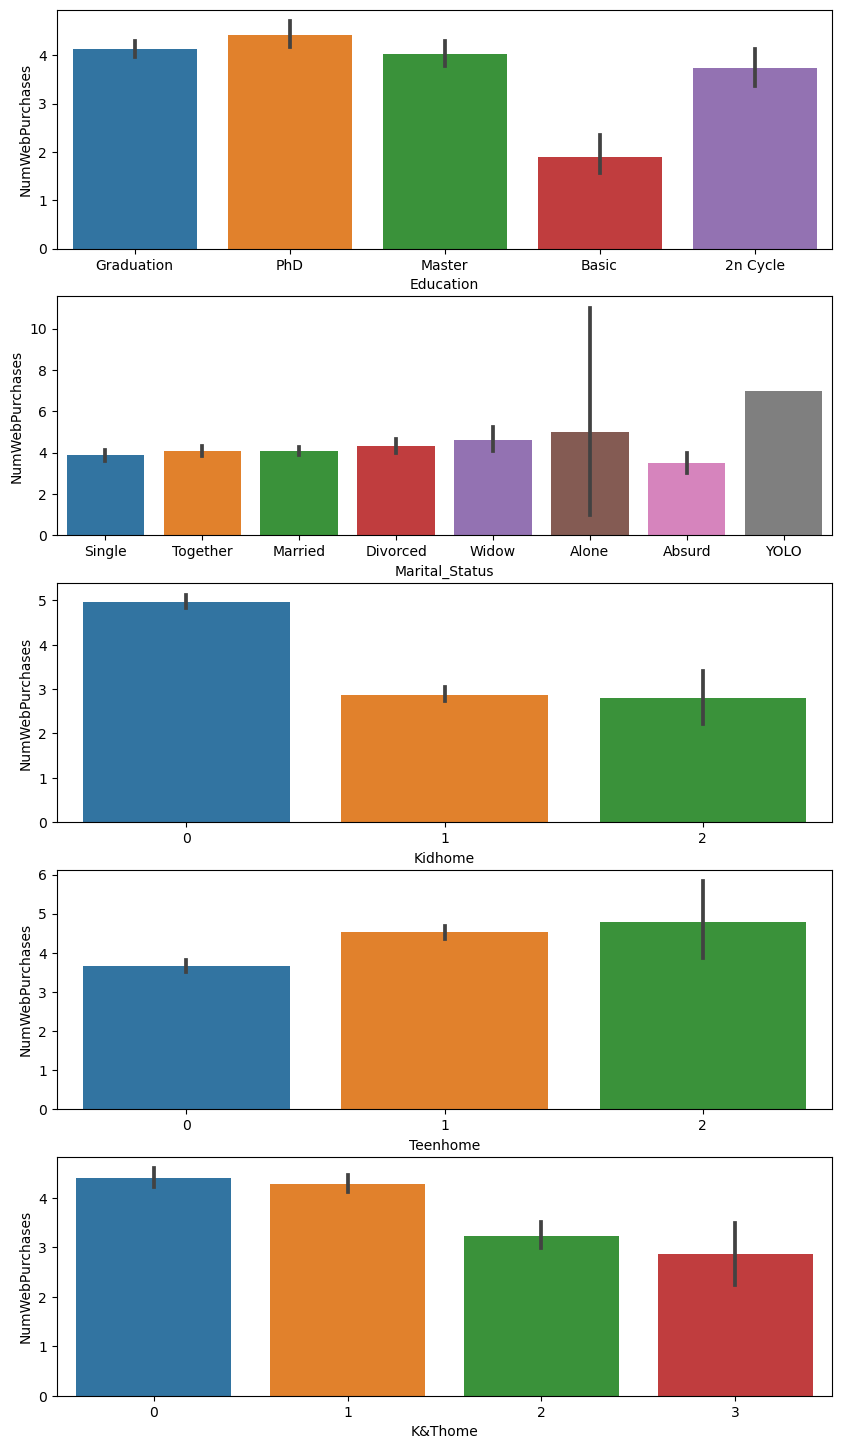

In [13]:
plt.tight_layout()
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=2.4)
fig, axs = plt.subplots(len(countplot_columns), 1, figsize=(10, 18))

for i in range(0, len(countplot_columns)):
    plt.subplot(len(countplot_columns), 1, i+1)
    sns.barplot(data=df, x=countplot_columns[i], y="NumWebPurchases")

Заметим, что люди без высшего образования реже делают покупки. А группа "Alone" является выбросом

<Figure size 640x480 with 0 Axes>

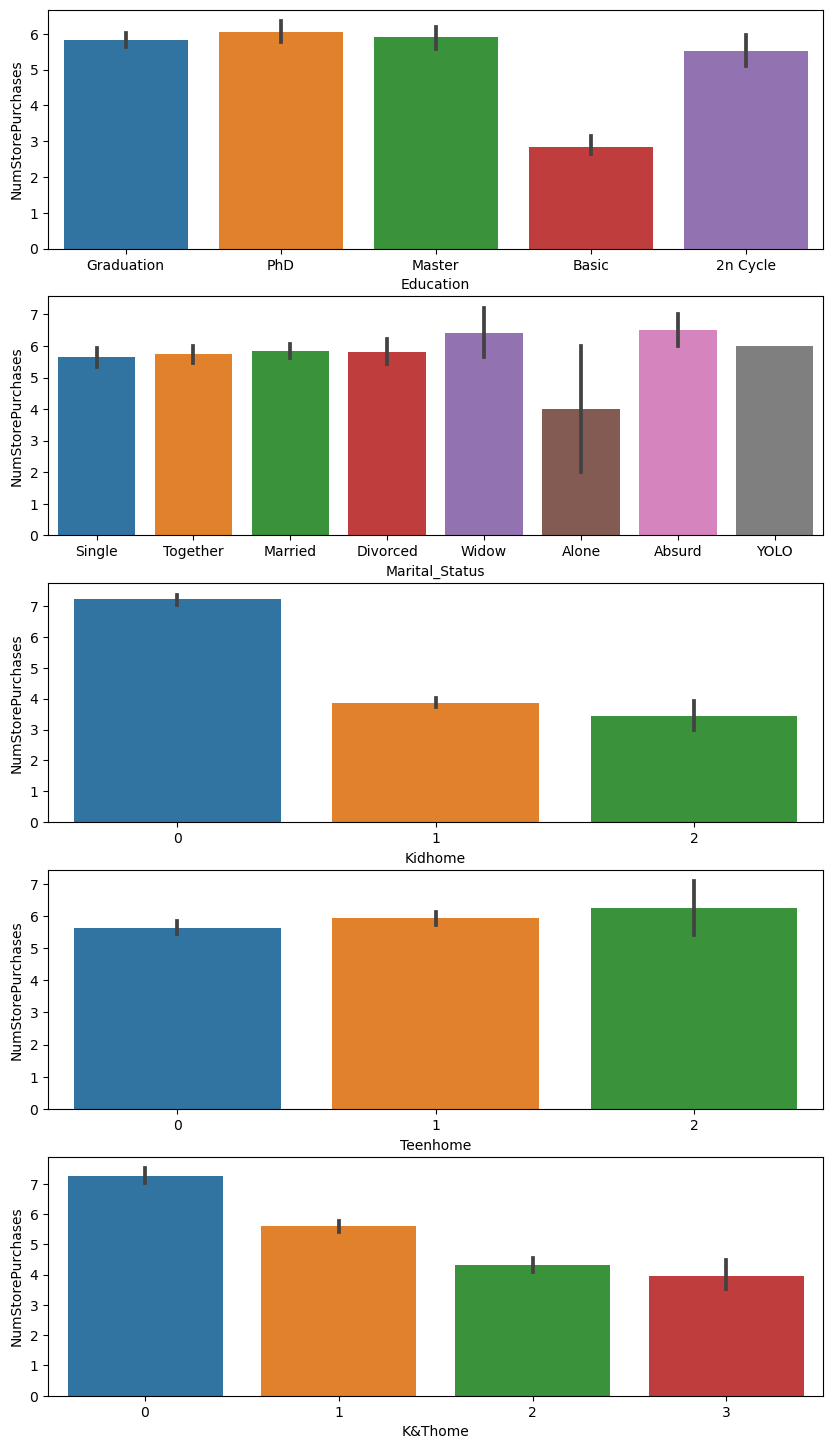

In [14]:
plt.tight_layout()
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=1.0)
fig, axs = plt.subplots(len(countplot_columns), 1, figsize=(10, 18))

for i in range(0, len(countplot_columns)):
    plt.subplot(len(countplot_columns), 1, i+1)
    sns.barplot(data=df, x=countplot_columns[i], y="NumStorePurchases")

Доход у людей без высшего образования меньше, чем люди с ним. Также заработок у группы "Absurde" выше, чем у других 

<Figure size 640x480 with 0 Axes>

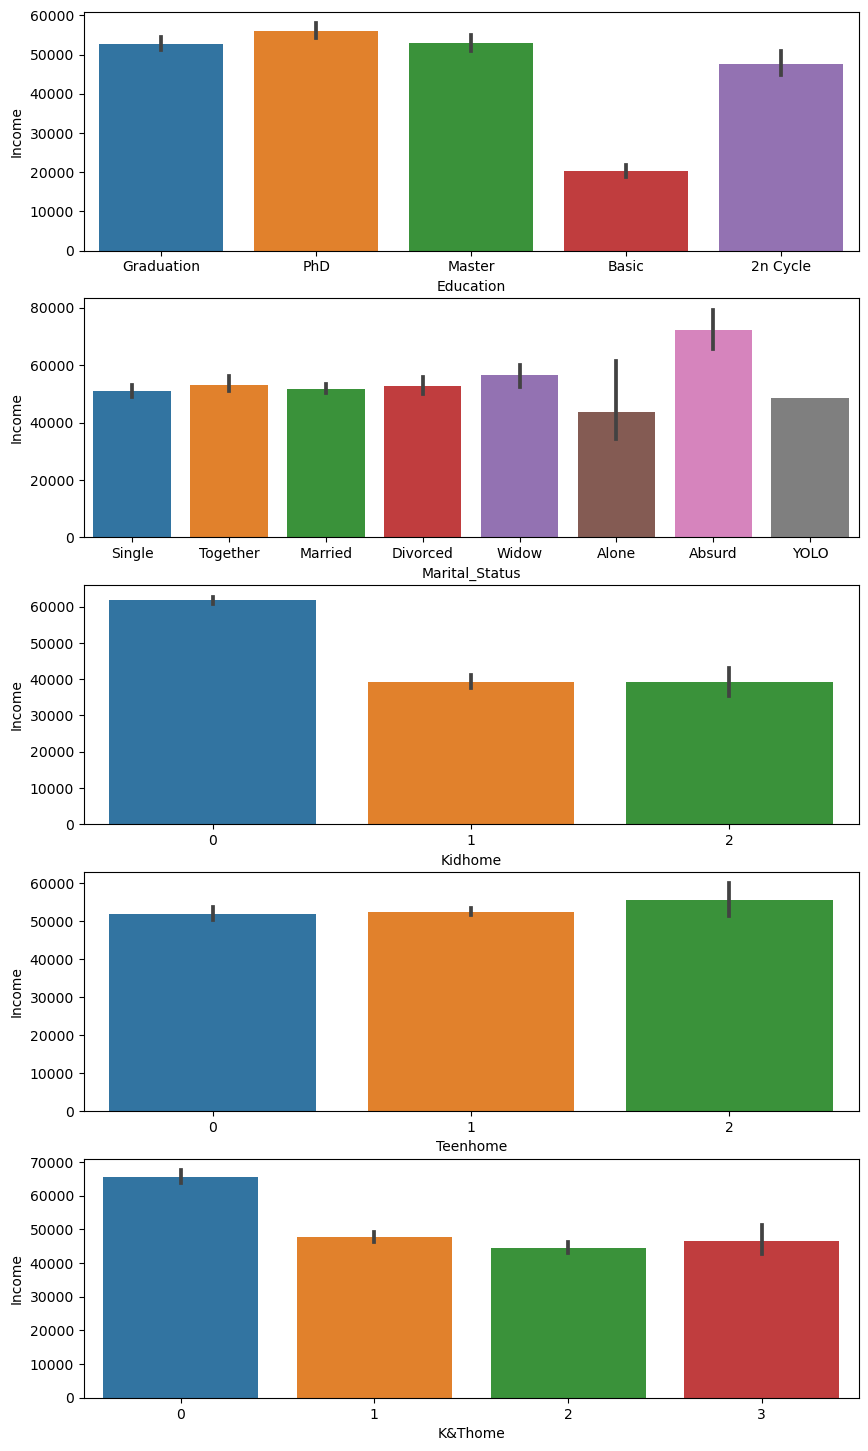

In [15]:
plt.tight_layout()
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=1.0)
fig, axs = plt.subplots(len(countplot_columns), 1, figsize=(10, 18))

for i in range(0, len(countplot_columns)):
    plt.subplot(len(countplot_columns), 1, i+1)
    sns.barplot(data=df, x=countplot_columns[i], y="Income")

Здесь же почти нет зависимостей с дургими столбцами

<Figure size 640x480 with 0 Axes>

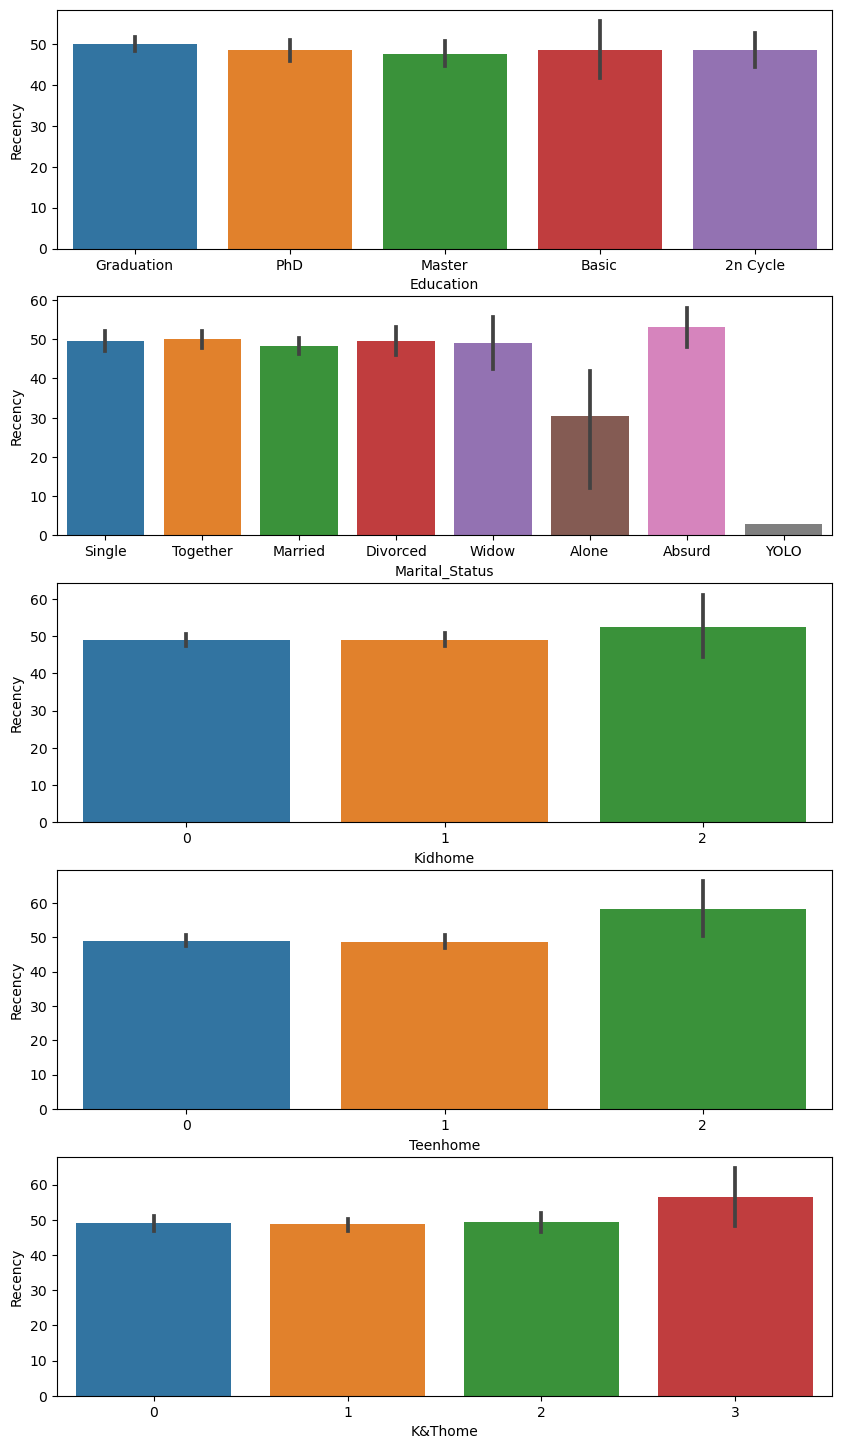

In [16]:
plt.tight_layout()
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=1.0)
fig, axs = plt.subplots(len(countplot_columns), 1, figsize=(10, 18))

for i in range(0, len(countplot_columns)):
    plt.subplot(len(countplot_columns), 1, i+1)
    sns.barplot(data=df, x=countplot_columns[i], y="Recency")

Аналогично, разные группы имеют разный возраст, однако вдовы в среднем старше всех

<Figure size 640x480 with 0 Axes>

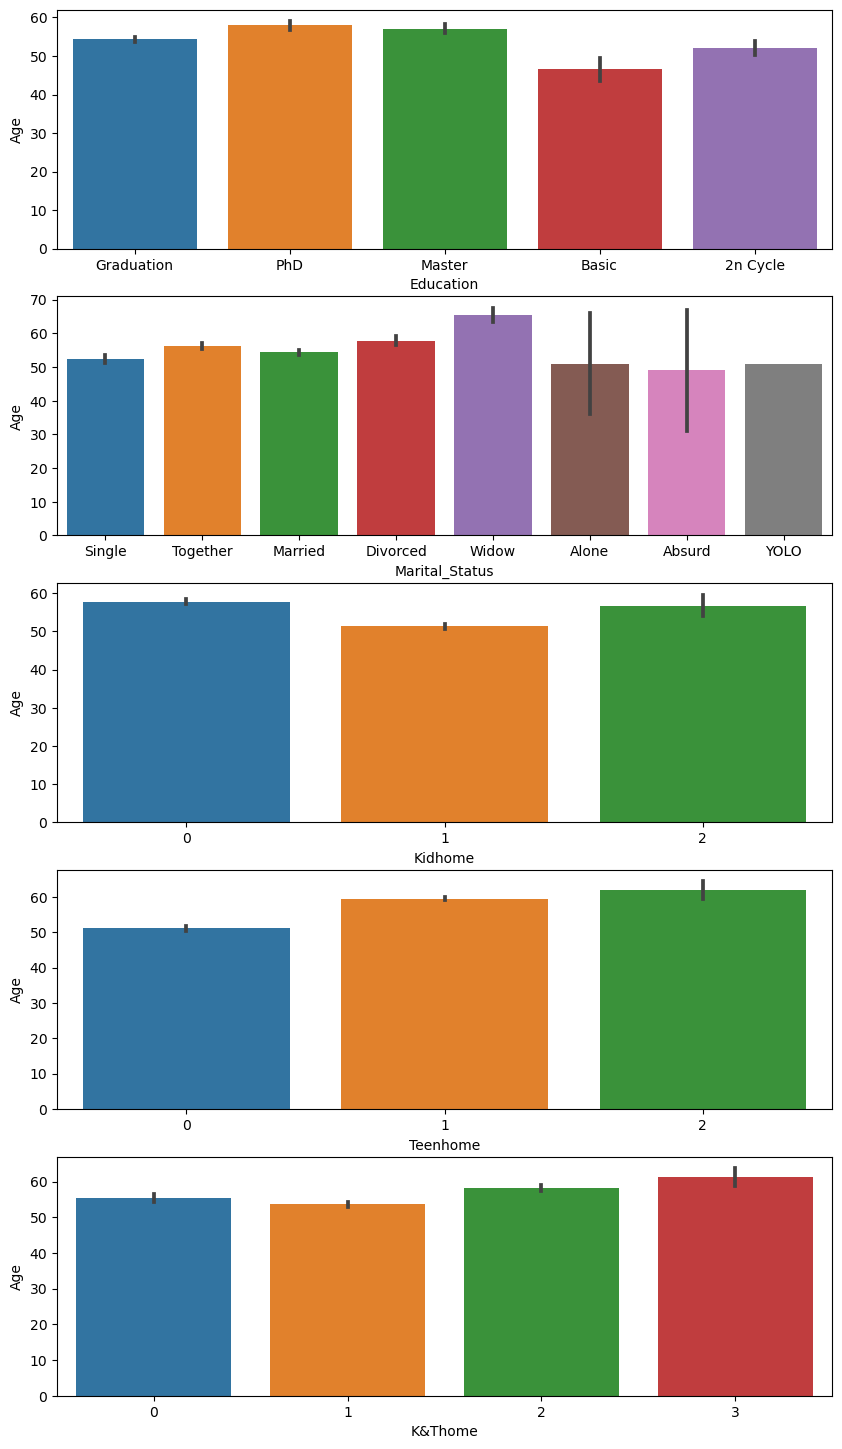

In [17]:
plt.tight_layout()
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=2.4, 
                    hspace=3.0)
fig, axs = plt.subplots(len(countplot_columns), 1, figsize=(10, 18))

for i in range(0, len(countplot_columns)):
    plt.subplot(len(countplot_columns), 1, i+1)
    sns.barplot(data=df, x=countplot_columns[i], y="Age")

Нет зависимости, графики имеют пики и впадины на всём промежутке

<Figure size 640x480 with 0 Axes>

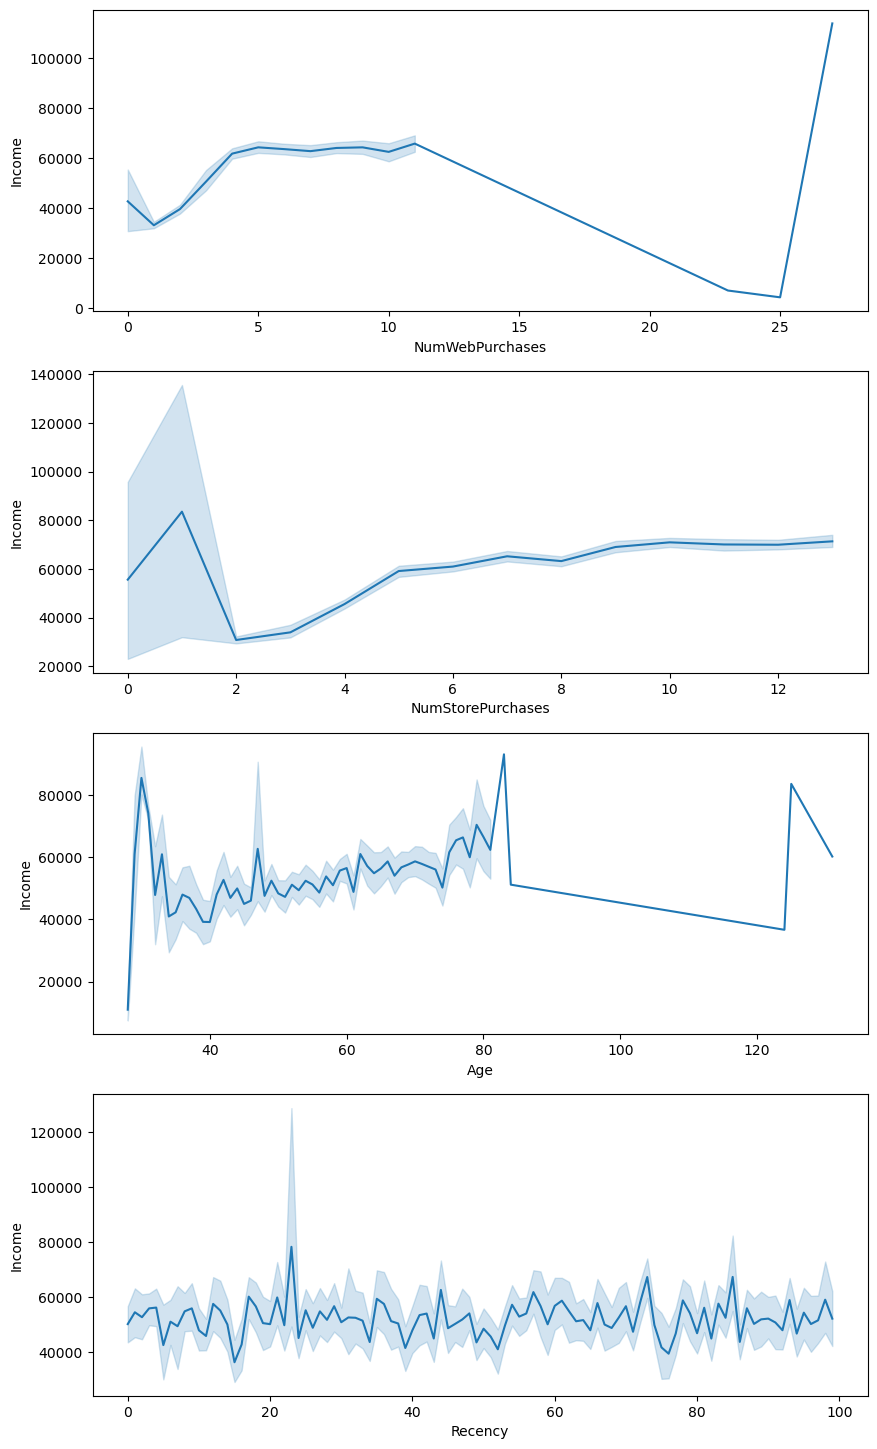

In [18]:
plt.tight_layout()
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.7)
line_columns = ["NumWebPurchases", "NumStorePurchases", "Age", "Recency"]
fig, axs = plt.subplots(len(line_columns), 1, figsize=(10, 18))
for i in range(0 , len(line_columns)):
    plt.subplot(len(line_columns), 1, i+1)
    sns.lineplot(data=df_nospaces, x=line_columns[i], y="Income")

Аналогично

<Figure size 640x480 with 0 Axes>

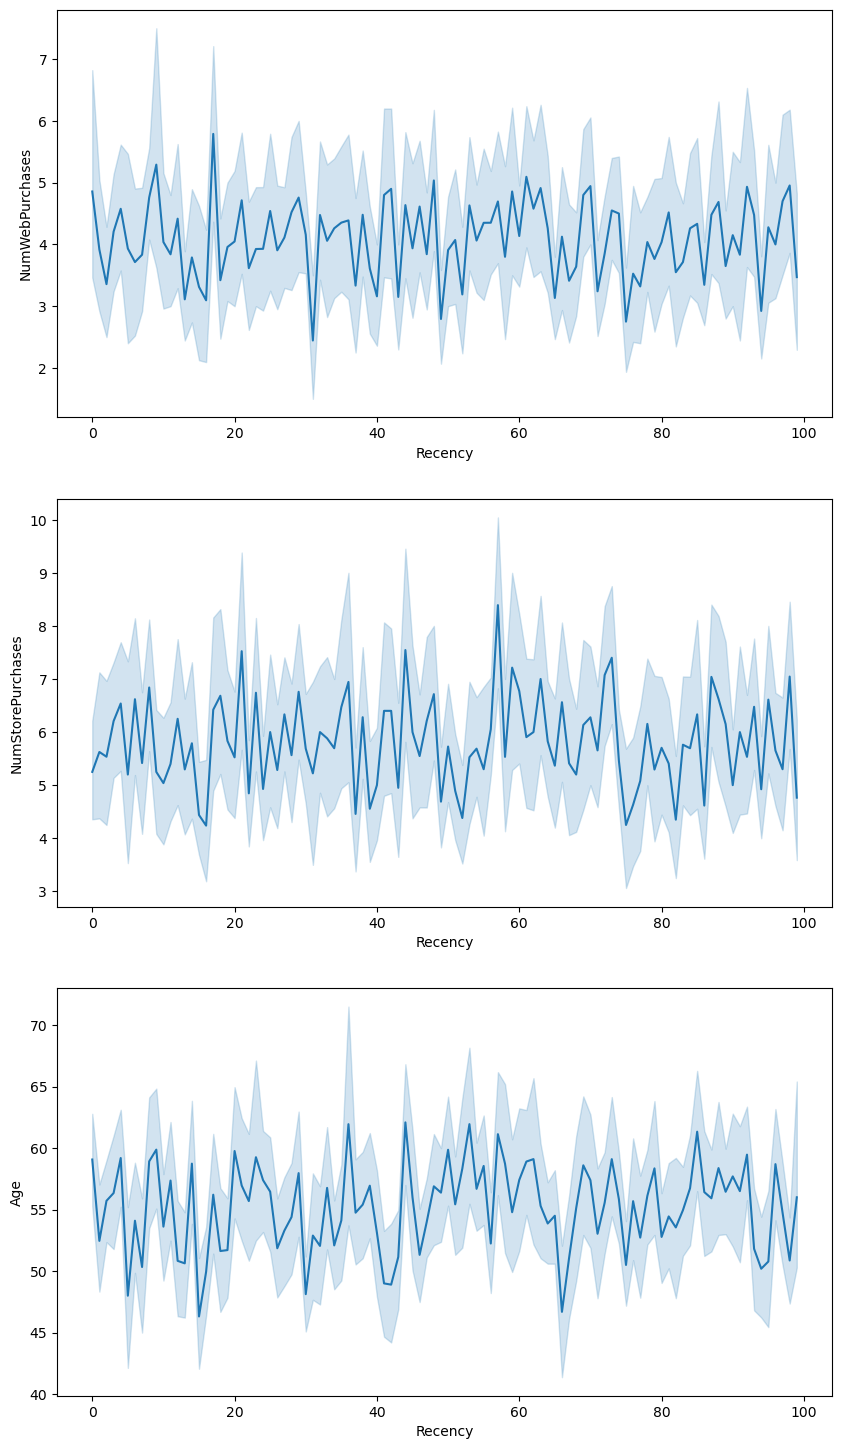

In [19]:
plt.tight_layout()
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.7)
line_columns = ["NumWebPurchases", "NumStorePurchases", "Age"]
fig, axs = plt.subplots(len(line_columns), 1, figsize=(10, 18))
for i in range(0 , len(line_columns)):
    plt.subplot(len(line_columns), 1, i+1)
    sns.lineplot(data=df_nospaces, x="Recency", y=line_columns[i])

<Figure size 640x480 with 0 Axes>

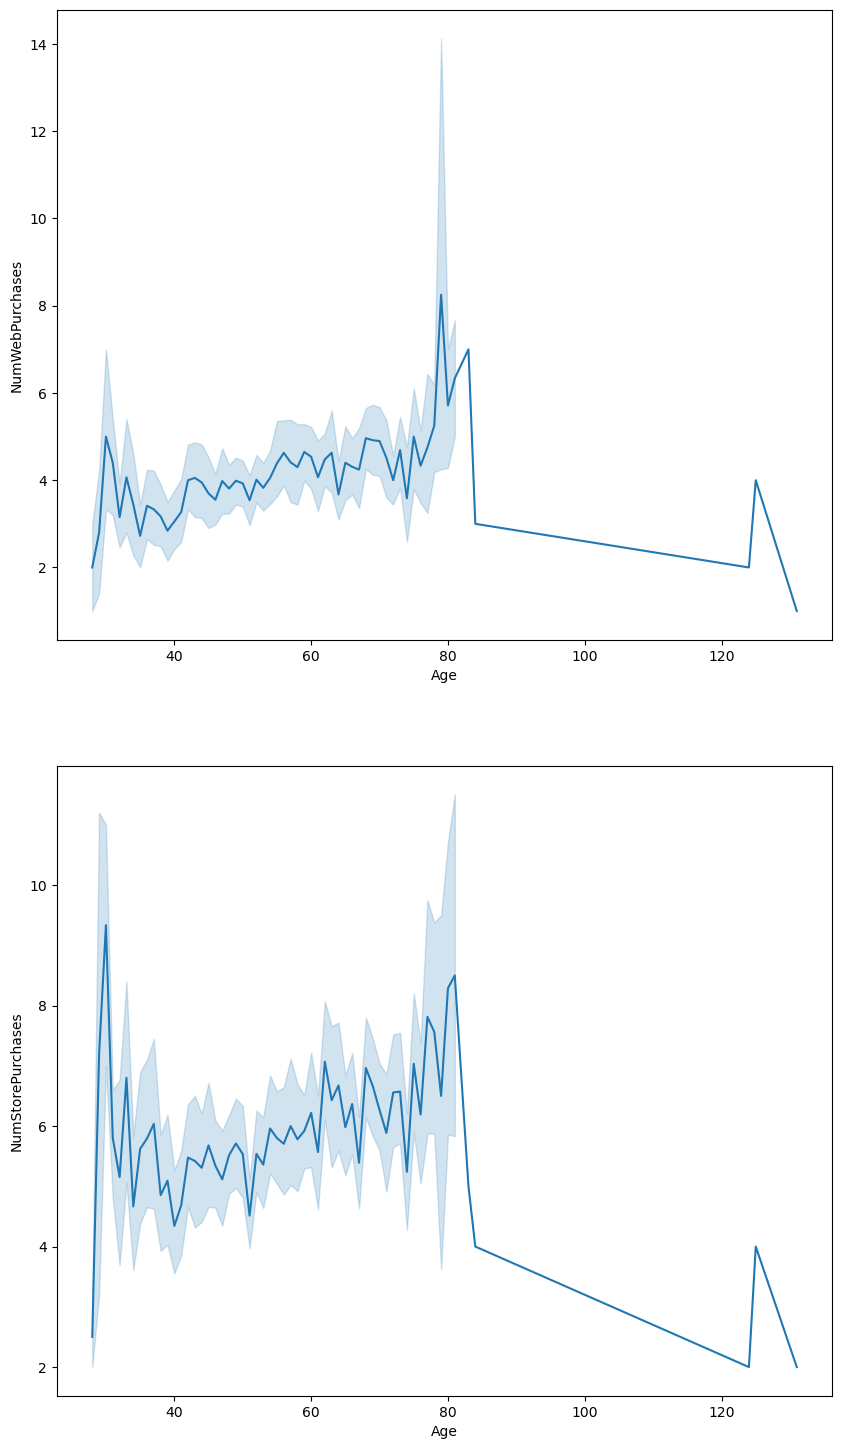

In [20]:
plt.tight_layout()
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.7)
line_columns = ["NumWebPurchases", "NumStorePurchases"]
fig, axs = plt.subplots(len(line_columns), 1, figsize=(10, 18))
for i in range(0 , len(line_columns)):
    plt.subplot(len(line_columns), 1, i+1)
    sns.lineplot(data=df_nospaces, x="Age", y=line_columns[i])

Здесь только можно заметить, что люди, которые покупают в много товаров в обычных магазинах, покупают много и онлайн 

<Figure size 640x480 with 0 Axes>

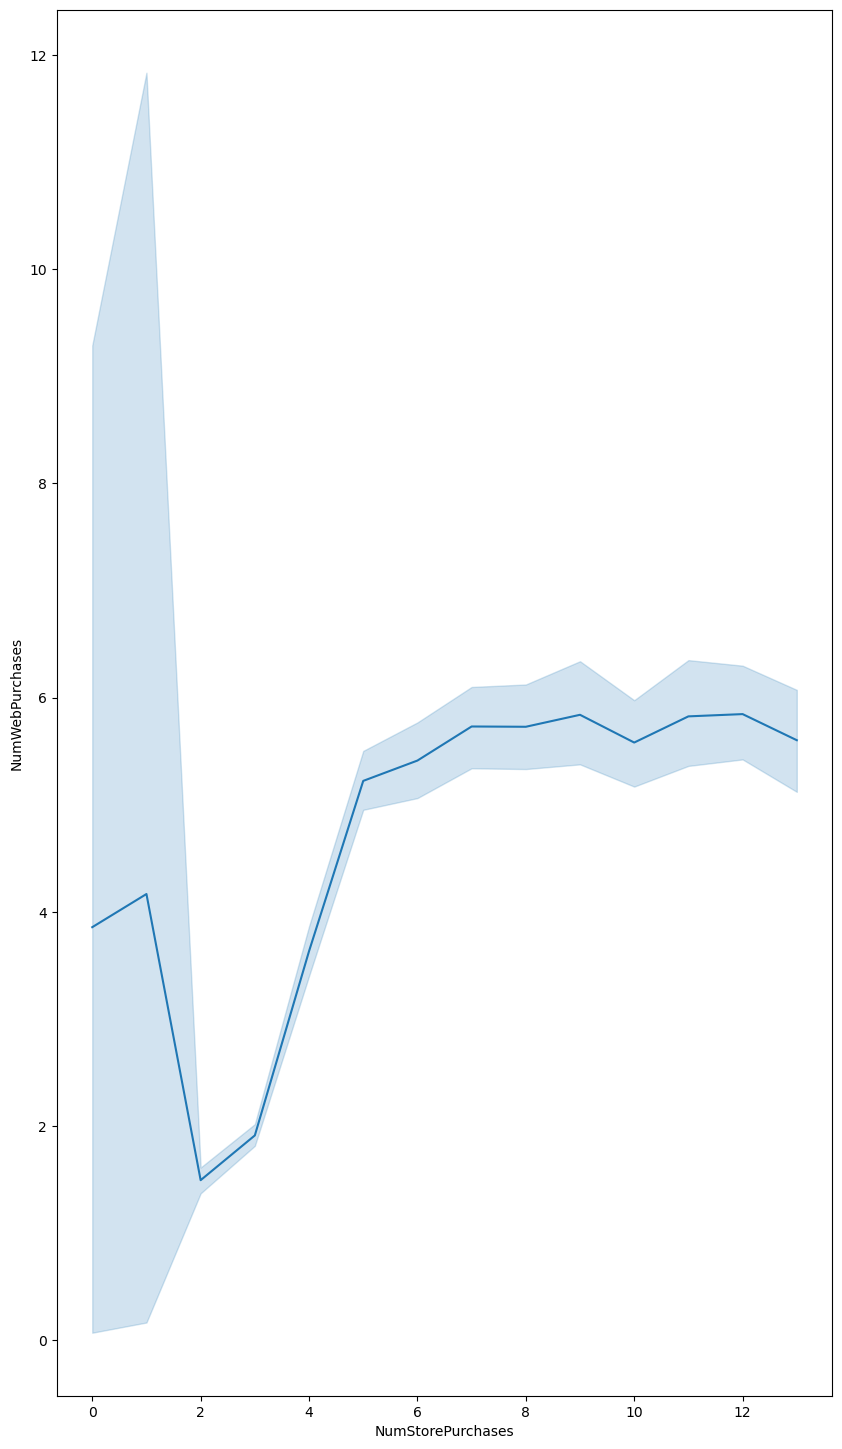

In [21]:
plt.tight_layout()
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.7)
line_columns = ["NumWebPurchases"]
fig, axs = plt.subplots(len(line_columns), 1, figsize=(10, 18))
for i in range(0 , len(line_columns)):
    plt.subplot(len(line_columns), 1, i+1)
    sns.lineplot(data=df_nospaces, x="NumStorePurchases", y=line_columns[i])

Большая часть столбцов с численными данными почти никак не зависит друг от друга, в отличие от других признаков. Особенно коррелирует с другими столбцами уровень образовния и семейное положение

## Hard

Будем считать, что целевая аудитория - группа людей с подавляющими общими признаками 

Если обратиться к графикам из предыдущего задания, то больше всего клиентов с высшим образованием, в браке или с партнёром, с одним ребёнком, с доходом ~ 50000, и в возрасте от 40 до 60 лет. Можно считать это целевой аудиторией

In [22]:
df["Purchase"] = df["NumWebPurchases"] + df["NumStorePurchases"] + df["NumDealsPurchases"] + df["NumCatalogPurchases"] 

In [23]:
target_aud = df[(df["Income"] <= 50000 + df["Income"].std()) & (df["Income"] >= 50000 - df["Income"].std()) & (df["Education"] == "Graduation") & ((df["Marital_Status"] == "Married") | (df["Marital_Status"] == "Together")) & (df['K&Thome'] == 1) & (df["Age"] <= df["Age"].mean() + df["Age"].std()) & (df["Age"] >= df["Age"].mean() - df["Age"].std())]

In [24]:
target_aud["Recency"].describe()

count    199.000000
mean      51.035176
std       28.606769
min        0.000000
25%       27.000000
50%       51.000000
75%       75.000000
max       99.000000
Name: Recency, dtype: float64

In [25]:
df["Recency"].describe()

count    2240.000000
mean       49.109375
std        28.962453
min         0.000000
25%        24.000000
50%        49.000000
75%        74.000000
max        99.000000
Name: Recency, dtype: float64

In [26]:
target_aud["Purchase"].describe()

count    199.000000
mean      16.547739
std        7.886600
min        4.000000
25%        9.500000
50%       17.000000
75%       23.000000
max       34.000000
Name: Purchase, dtype: float64

In [27]:
df["Purchase"].describe()

count    2240.000000
mean       14.862054
std         7.677173
min         0.000000
25%         8.000000
50%        15.000000
75%        21.000000
max        44.000000
Name: Purchase, dtype: float64

Если сравнивать описательные статистики у всех покупателей и у той группу людей, которую мы выбрали целевой, то можно заметить, что они несильно отличаются, причём у target_aud значение даже немного больше. Значит, выше был описан портрет среднестатистического клиента 

In [28]:
new_target = df[df["Purchase"] >= df["Purchase"].quantile(0.75)]

In [29]:
new_target.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,K&Thome,Purchase
count,607.000000,607.000000,601.000000,607.000000,607.000000,607.000000,607.000000,607.000000,607.000000,607.000000,...,607.000000,607.000000,607.000000,607.000000,607.0,607.0,607.000000,607.000000,607.00000,607.000000
mean,5505.876442,1966.644152,68003.713810,0.174629,0.593081,49.263591,597.408567,47.635914,307.347611,67.291598,...,0.133443,0.148270,0.024712,0.008237,3.0,11.0,0.202636,57.355848,0.76771,24.637562
std,3118.668712,11.781505,14661.871986,0.405184,0.548762,28.523102,284.104919,46.958772,249.186345,63.650388,...,0.340334,0.355661,0.155373,0.090459,0.0,0.0,0.402295,11.781505,0.70856,3.274127
min,17.000000,1941.000000,2447.000000,0.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,29.000000,0.00000,21.000000
25%,2934.000000,1957.000000,58710.000000,0.000000,0.000000,25.000000,387.000000,12.000000,132.000000,16.000000,...,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,49.000000,0.00000,22.000000
50%,5299.000000,1967.000000,67445.000000,0.000000,1.000000,49.000000,554.000000,30.000000,223.000000,46.000000,...,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,57.000000,1.00000,24.000000
75%,8140.000000,1975.000000,76995.000000,0.000000,1.000000,73.000000,772.500000,72.000000,421.000000,104.000000,...,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,67.000000,1.00000,26.000000
max,11171.000000,1995.000000,160803.000000,2.000000,2.000000,99.000000,1449.000000,199.000000,1725.000000,259.000000,...,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000,83.000000,3.00000,44.000000


Можно взять квантиль 75% по суммарному количеству всех покупок, так мы можем определить портрет клиента, который покупает товары больше остальных

<Figure size 640x480 with 0 Axes>

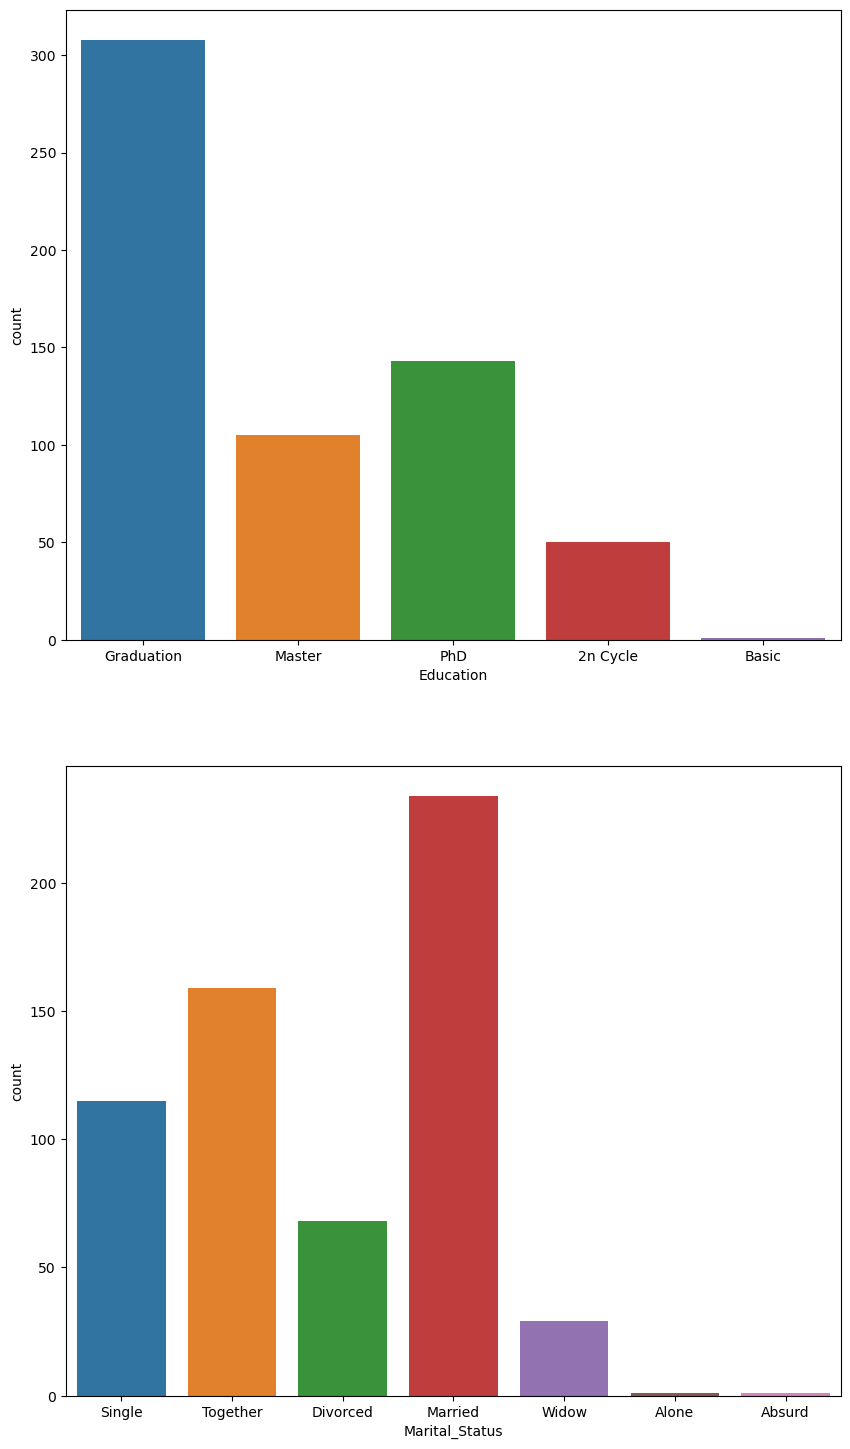

In [30]:
countplot_columns = ["Education", "Marital_Status"]
plt.tight_layout()
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.7)
fig, axs = plt.subplots(len(countplot_columns), 1, figsize=(10, 18))

for i in range(0, len(countplot_columns)):
    plt.subplot(len(countplot_columns), 1, i+1)
    sns.countplot(x=countplot_columns[i], data=new_target)

Видно, что с уровнем образования и семейным положением мы угадали

In [31]:
target_aud = df[(df["Income"] <= new_target["Income"].std() + new_target["Income"].mean()) & (df["Income"] >= new_target["Income"].mean() - new_target["Income"].std()) &(df["Education"] == "Graduation") & (df["Marital_Status"] == "Married") & ((df['K&Thome'] == 1) | (df['K&Thome'] == 0)) & (df["Age"] <= new_target["Age"].mean() + new_target["Age"].std()) & (df["Age"] >= new_target["Age"].mean() - new_target["Age"].std())]

In [32]:
target_aud["Purchase"].describe()

count    113.000000
mean      21.026549
std        5.273688
min       10.000000
25%       17.000000
50%       21.000000
75%       25.000000
max       34.000000
Name: Purchase, dtype: float64

Взяв людей из 75% квантиля, получили результат лучше, чем просто взяв самые популярные группы. В обоих случаях группы совпадают. Значит, можно взять такой портрет, т.к. среднее значение больше и размах меньше 